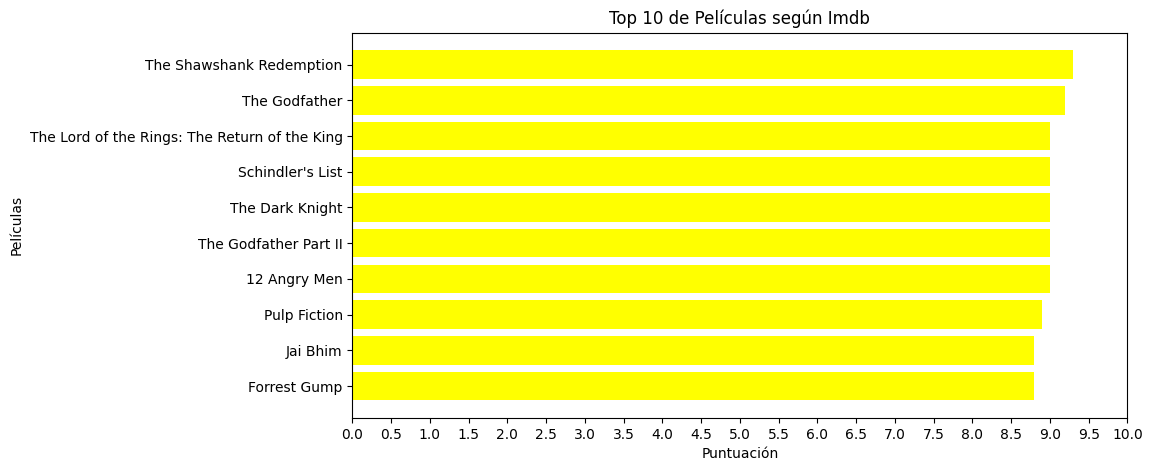

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("../frontend/src/data/movies.csv")

top_10 = df.sort_values(by = "rating", ascending = False).tail(10)

plt.figure(figsize=(10, 5))
plt.barh(top_10["name"], top_10["rating"], color="yellow")

plt.xticks(np.arange(0, 10.1, 0.5))

plt.xlabel("Puntuación")
plt.ylabel("Películas")
plt.title("Top 10 de Películas según Imdb")
plt.show()

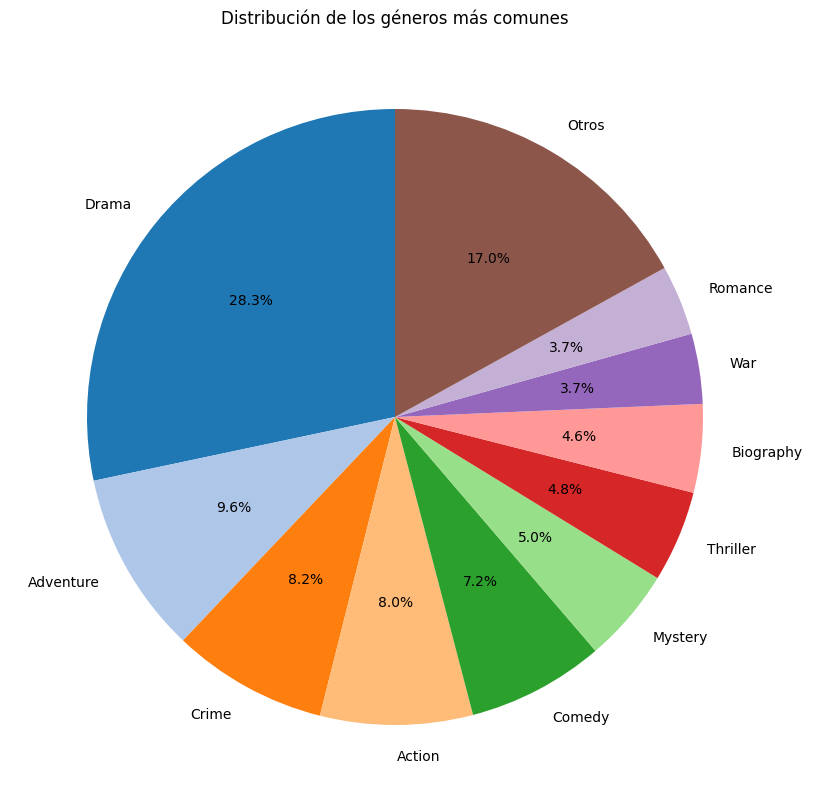

In [2]:
generos_separados = df["genre"].dropna().str.split(",")
todos_los_generos = [genero.strip() for lista in generos_separados for genero in lista]
conteo_generos = pd.Series(todos_los_generos).value_counts()

generos_comunes = conteo_generos.head(10)
otros = conteo_generos[10:].sum()
generos_comunes["Otros"] = otros

generos_comunes.plot.pie(autopct = '%1.1f%%', figsize = (10,10), startangle=90, colors = plt.cm.tab20.colors)

plt.ylabel("")
plt.title("Distribución de los géneros más comunes")
plt.show()

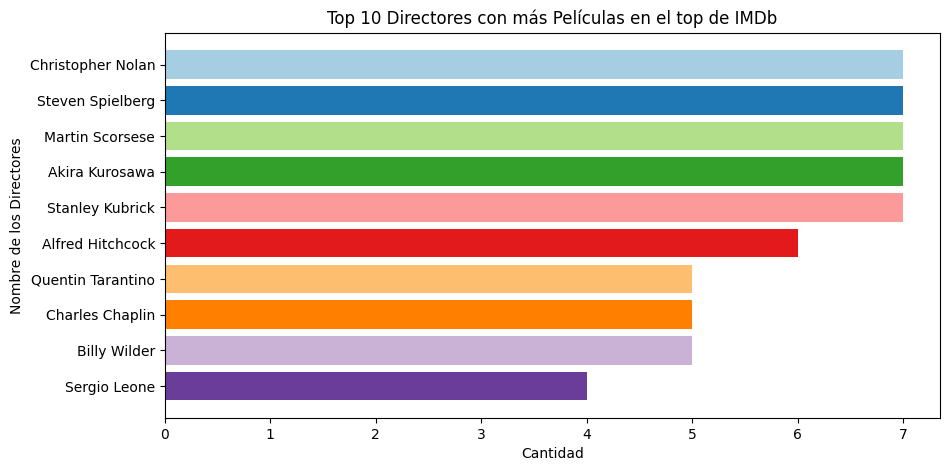

In [3]:
directores_separados = df["directors"].dropna().str.split(",")
todos_los_directores = [director.strip() for lista in directores_separados for director in lista]
conteo_directores = pd.Series(todos_los_directores).value_counts()

directores_comunes = conteo_directores.head(10)

plt.figure(figsize=(10,5))
plt.barh(directores_comunes.index, directores_comunes.values, color=plt.cm.Paired.colors)

plt.xlabel("Cantidad")
plt.ylabel("Nombre de los Directores")
plt.title("Top 10 Directores con más Películas en el top de IMDb")
plt.gca().invert_yaxis()
plt.show()

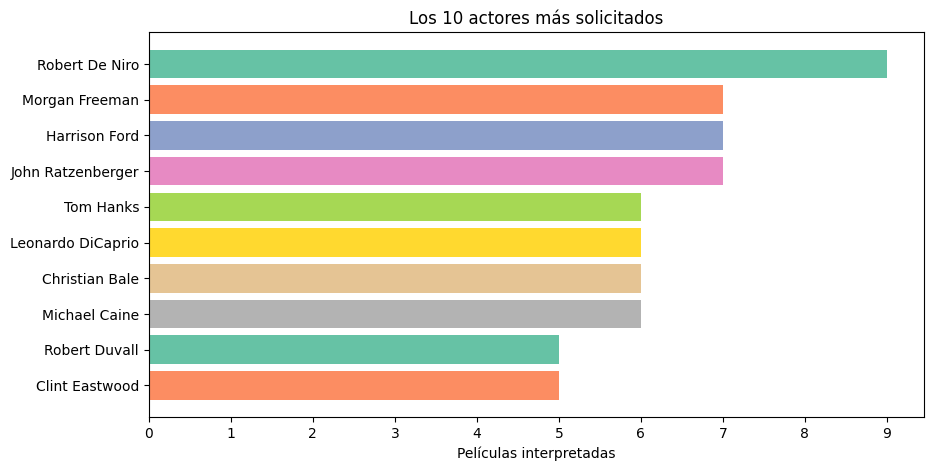

In [4]:
actores_separados = df["casts"].dropna().str.split(",")
todos_los_actores = [actor.strip() for lista in actores_separados for actor in lista]
conteo_actores = pd.Series(todos_los_actores).value_counts()

top_10_actores = conteo_actores.head(10)

plt.figure(figsize=(10,5))
plt.barh(top_10_actores.index, top_10_actores.values, color = plt.cm.Set2.colors)


plt.xlabel("Películas interpretadas")
plt.title("Los 10 actores más solicitados")
plt.gca().invert_yaxis()
plt.xticks(range(0, max(top_10_actores.values)+1))
plt.show()

In [ ]:
#Acá vamos a convertir los valores que dicen "Not Available" a valores númericos para poder realizar gráficos con exito
df["box_office"] = df["box_office"].replace("Not Available", pd.NA)
df["budget"] = df["budget"].replace("Not Available", pd.NA)

df["box_office"] = pd.to_numeric(df["box_office"], errors="coerce")
df["budget"] = pd.to_numeric(df["budget"], errors="coerce")

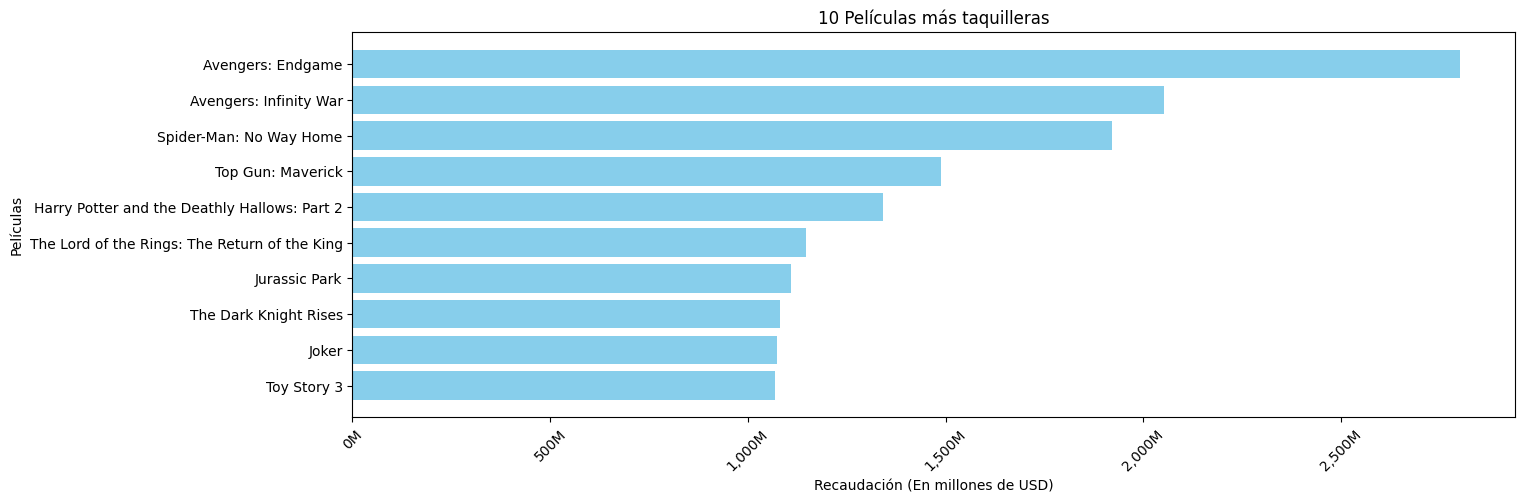

In [ ]:
taquilla = df.sort_values(by="box_office", ascending=False).head(10)

plt.figure(figsize=(15, 5))
plt.barh(taquilla['name'], taquilla["box_office"] / 1e6, color = "skyblue")

plt.title("10 Películas más taquilleras")
plt.xlabel("Recaudación (En millones de USD)")
plt.xticks(rotation = 45)
plt.ylabel("Películas")
plt.gca().invert_yaxis()
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}M'))
plt.show()

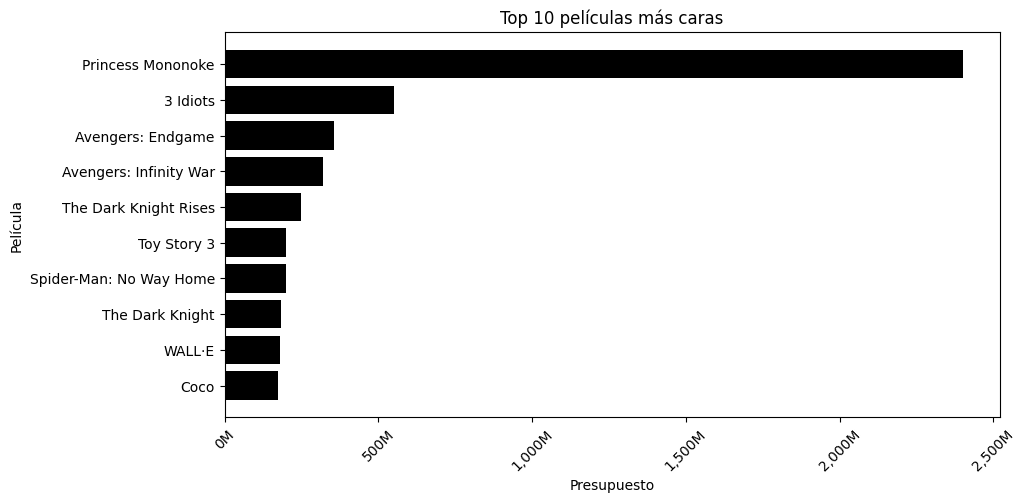

In [21]:
presupuesto = df.sort_values(by=["budget"], ascending=False).head(10)

plt.figure(figsize= (10,5))
plt.barh(presupuesto["name"], presupuesto["budget"], color = "black")

plt.title("Top 10 películas más caras")
plt.xlabel("Presupuesto")
plt.ylabel("Película")
plt.xticks(rotation = 45)
plt.gca().invert_yaxis()
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1e6:,.0f}M'))
plt.show()

In [24]:
def convertir_a_dolares(row):
    if row['name'] == "Princess Mononoke":
        return row['budget'] * 0.0077
    elif row['name'] == "3 Idiots":
        return row['budget'] * 0.012
    return row['budget']

df['budget_usd'] = df.apply(convertir_a_dolares, axis = 1)

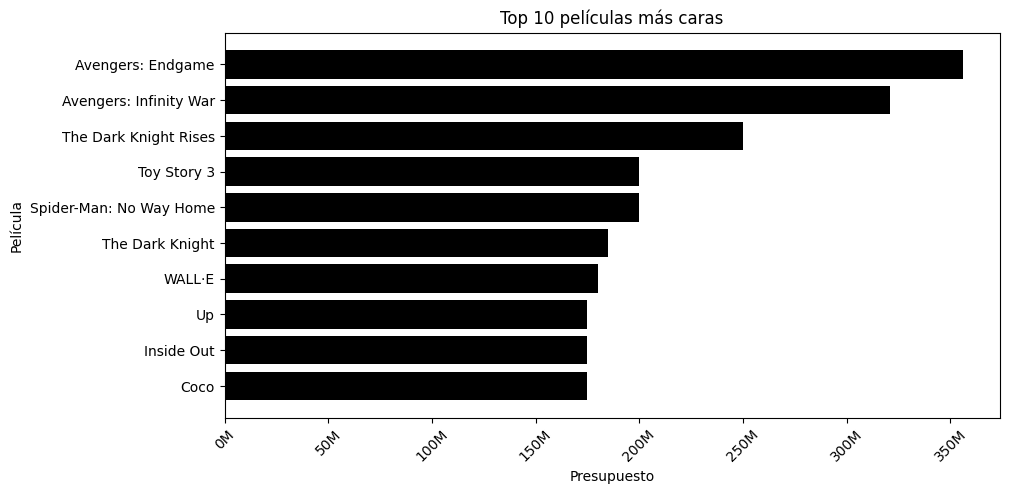

In [26]:
presupuesto = df.sort_values(by=["budget_usd"], ascending=False).head(10)

plt.figure(figsize= (10,5))
plt.barh(presupuesto["name"], presupuesto["budget_usd"], color = "black")

plt.title("Top 10 películas más caras")
plt.xlabel("Presupuesto")
plt.ylabel("Película")
plt.xticks(rotation = 45)
plt.gca().invert_yaxis()
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1e6:,.0f}M'))
plt.show()